In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os, glob

from owlready2 import *
import owlready2
print(owlready2.VERSION)

import importlib.util
import sys
spec = importlib.util.spec_from_file_location("rdfutils", "../../utils/rdfutils.py")
u = importlib.util.module_from_spec(spec)
sys.modules["rdfutils"] = u
spec.loader.exec_module(u)

from datetime import datetime

0.40


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [3]:
onto = get_ontology("../work/pbn_t3_5_v0.5.owl").load()
dIDct = u.createDict(onto) 

error with the maxes ISO_Impact
error with the maxes BP_Theme
error with the maxes BP_Category
error with the maxes aBlueprint


In [4]:
def sparql(REQ):
    return list(default_world.sparql(REQ))

# Counting elements

In [78]:
stats = []
for k in onto.RiskSubgroup.instances():
    A = k.has_SubgroupRisk[0]
    Group = A.has_RiskGroup[0].label
    label = k.label[0]
    #print(label,Group,k)
    A = sparql("""PREFIX pbn: <https://github.com/mm80843/T3.5/raw/main/pbn_t3_5.owl#>

        SELECT ?riskSubgroup (COUNT(?risk) AS ?riskCount)
        WHERE {

        ?risk a pbn:Risk . 
        ?riskSubgroup a pbn:RiskSubgroup . 
            
        ?risk pbn:has_RiskSubgroup ?riskSubgroup .
                
        FILTER (?riskSubgroup = pbn:"""+str(k).split(".")[-1]+""") 
        }
                
        GROUP BY ?riskSubgroup
        ORDER BY DESC(?riskCount)
        LIMIT 10""")

    stats.append([Group[0],k.label[0],A[0][1]])
StatsRisks = pd.DataFrame(stats,columns=["RiskGroup","RiskSubroup","Count"]).sort_values(by=["RiskGroup","RiskSubroup"])
StatsRisks

,RiskGroup,RiskSubroup,Count
56,Data privacy and security risks,Cybersecurity threats,31
14,Data privacy and security risks,Data security risks,279
13,Data privacy and security risks,Inaccurate or incomplete data,180
85,Data privacy and security risks,Limited accessibility and data equity,23
79,Data privacy and security risks,Misuse of personal data,9
...,...,...,...
52,Technological risks,Infrastructure and connectivity risks,265
40,Technological risks,Innovation and adoption risks,339
11,Technological risks,Modeling and prediction risks,137
10,Technological risks,Modeling and simulation risks,165


In [79]:
import numpy as np

In [80]:
StatsRisks = pd.DataFrame(stats,columns=["RiskGroup","RiskSubroup","Count"]).sort_values(by=["RiskGroup","RiskSubroup"])
StatsRisks.Count = StatsRisks.Count.apply (lambda x: np.log(x)-4)
StatsRisks

,RiskGroup,RiskSubroup,Count
56,Data privacy and security risks,Cybersecurity threats,-0.566013
14,Data privacy and security risks,Data security risks,1.631212
13,Data privacy and security risks,Inaccurate or incomplete data,1.192957
85,Data privacy and security risks,Limited accessibility and data equity,-0.864506
79,Data privacy and security risks,Misuse of personal data,-1.802775
...,...,...,...
52,Technological risks,Infrastructure and connectivity risks,1.579730
40,Technological risks,Innovation and adoption risks,1.826000
11,Technological risks,Modeling and prediction risks,0.919981
10,Technological risks,Modeling and simulation risks,1.105945


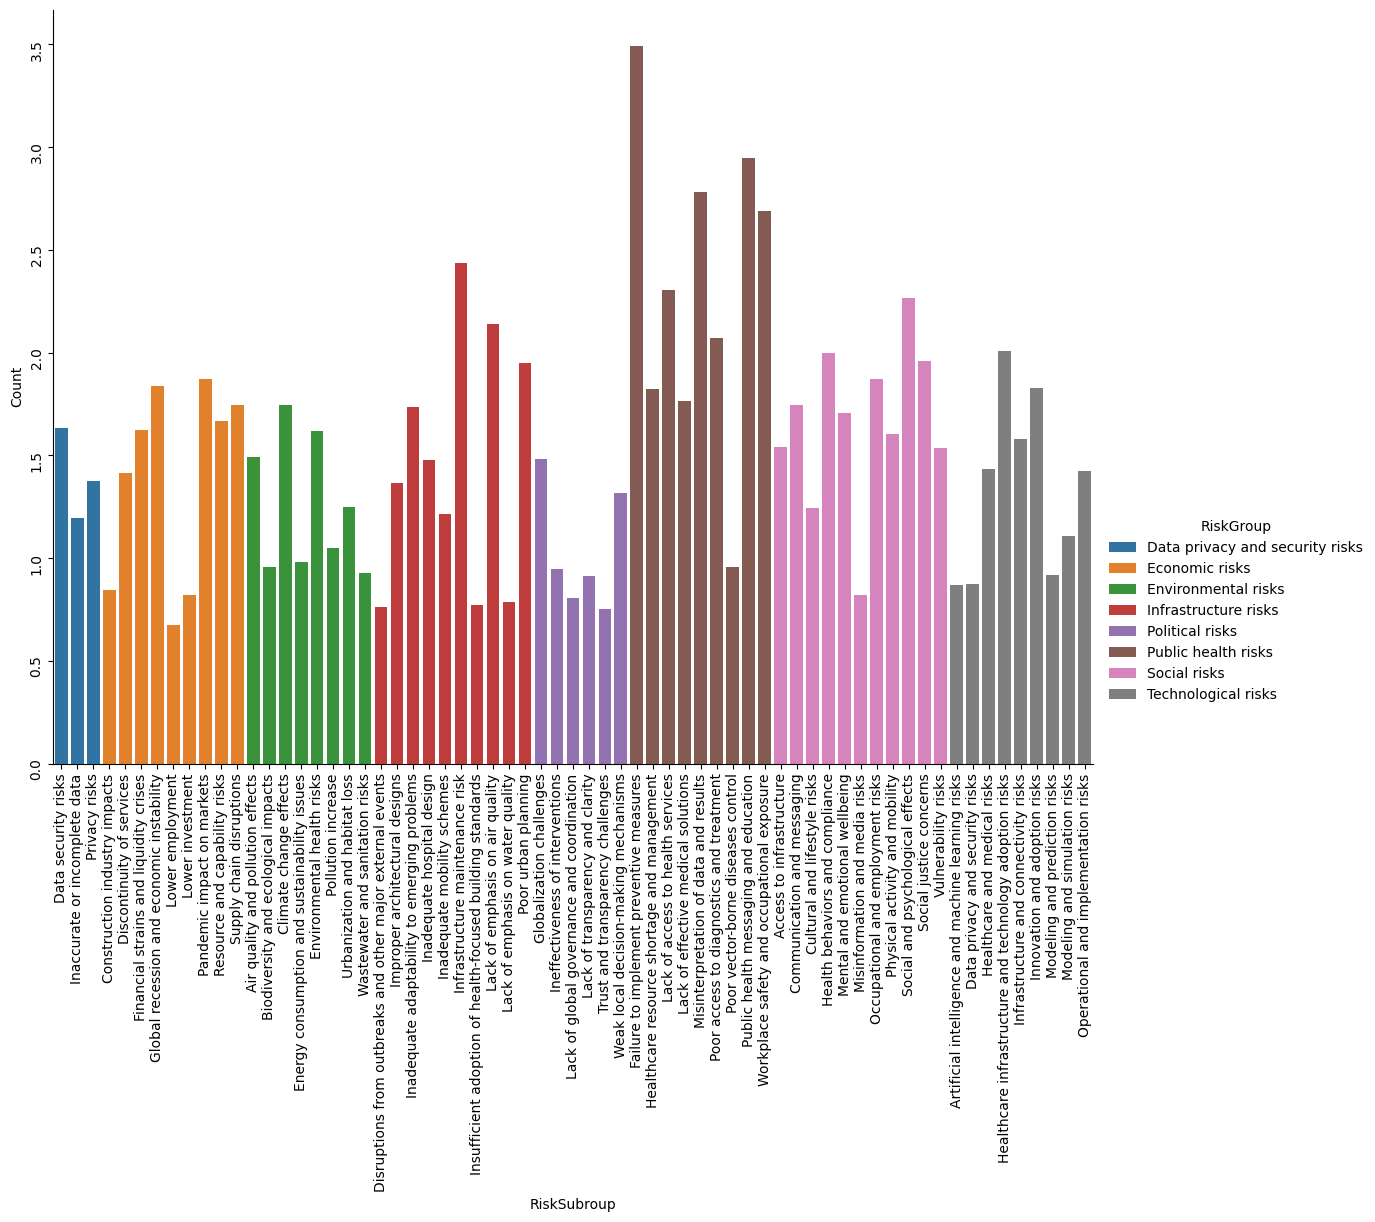

In [81]:
import seaborn as sns

g = sns.catplot(
    x="RiskSubroup",       # x variable name
    y="Count",       # y variable name
    hue="RiskGroup",  # group variable name
    data=StatsRisks[StatsRisks.Count > np.log(100)-4],     # dataframe to plot
    height=8.27, aspect=11.7/8.27,
    kind="bar",
)
g.tick_params(labelrotation=90)

In [6]:
stats = []
for k in onto.StakeholderSubgroup.instances():
    A = k.has_SubgroupStakeholder[0]
    Group = A.has_StakeholderGroup[0].label
    label = k.label[0]
    #print(label,Group,k)
    A = sparql("""PREFIX pbn: <https://github.com/mm80843/T3.5/raw/main/pbn_t3_5.owl#>

        SELECT ?stakeholderSubgroup (COUNT(?stakeholder) AS ?stakeholderCount)
        WHERE {

        ?stakeholder a pbn:Stakeholder . 
        ?stakeholderSubgroup a pbn:StakeholderSubgroup . 
            
        ?stakeholder pbn:has_StakeholderSubgroup ?stakeholderSubgroup .
                
        FILTER (?stakeholderSubgroup = pbn:"""+str(k).split(".")[-1]+""") 
        }
                
        GROUP BY ?stakeholderSubgroup
        ORDER BY DESC(?stakeholderCount)
        LIMIT 10""")

    stats.append([Group[0],k.label[0],A[0][1]])
StatsStakeholder = pd.DataFrame(stats,columns=["StakeholderGroup","StakeholderSubroup","Count"]).sort_values(by=["StakeholderGroup","StakeholderSubroup"])
StatsStakeholder

,StakeholderGroup,StakeholderSubroup,Count
91,Cities officials,Municipality officials,12
162,Cities officials,Other cities departments,18
142,Cities officials,Smart city managers,4
94,Cities professionals,City planning professionals,33
35,Cities professionals,Individual urban planners and designers,11
...,...,...,...
39,Workers,Physical workers,592
45,Workers,Project managers,168
100,Workers,Real estate agents,22
47,Workers,Waste management workers,31


In [61]:
# Review blueprints
## Per intervention
## Per domain of intervention
## Per technology
# ?

{pbn_t3_5_v0.5.has_BPDescription, pbn_t3_5_v0.5.has_BPPhase, pbn_t3_5_v0.5.has_BPTitle, pbn_t3_5_v0.5.has_BPDemonstrated, pbn_t3_5_v0.5.has_BPIntervention, pbn_t3_5_v0.5.has_BlueprintSubject, pbn_t3_5_v0.5.has_BPType, pbn_t3_5_v0.5.has_BPRestriction, pbn_t3_5_v0.5.has_BPPermanent, rdf-schema.label, pbn_t3_5_v0.5.has_BPReason, pbn_t3_5_v0.5.has_BPEnabler, pbn_t3_5_v0.5.has_BPTransmission, pbn_t3_5_v0.5.has_BPValueProposition, pbn_t3_5_v0.5.has_BPContext, pbn_t3_5_v0.5.has_BPScale, pbn_t3_5_v0.5.has_BlueprintOwner, pbn_t3_5_v0.5.has_BPCapabilities, pbn_t3_5_v0.5.has_BPProblem}


<Axes: title={'center': 'Interventions used by the blueprints'}, ylabel='Intervention'>

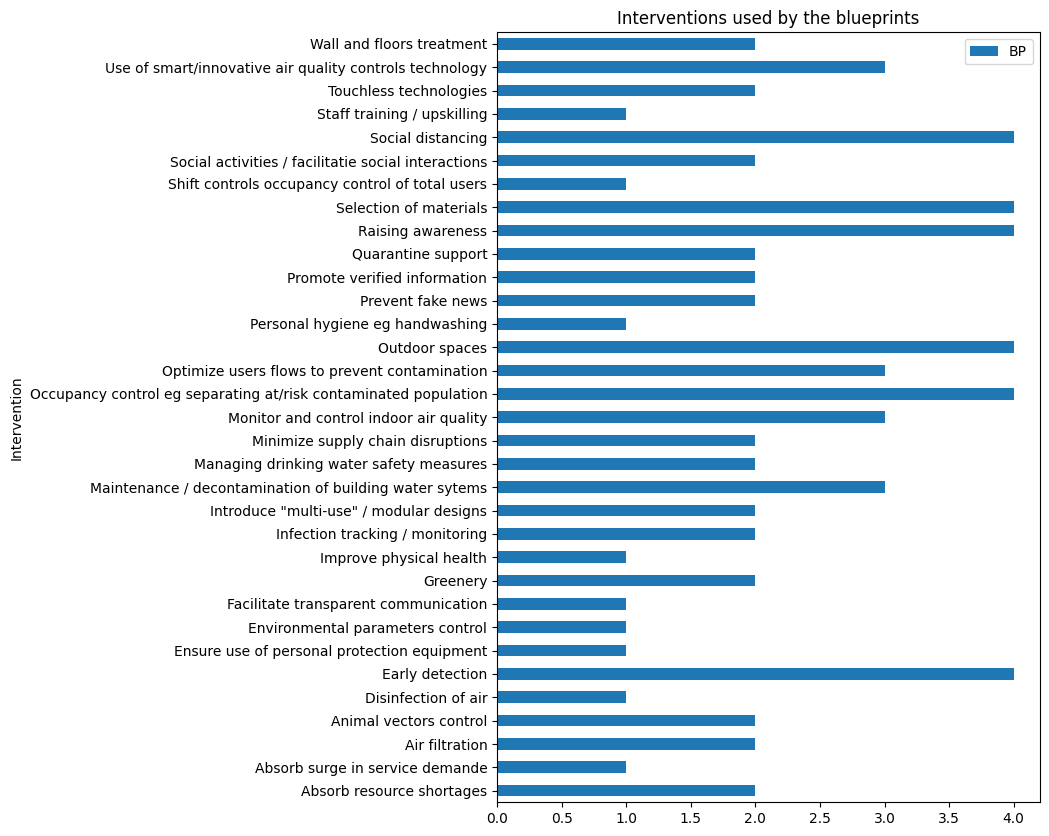

In [40]:
print(onto.Blueprint.instances()[0].get_properties())
ALL = []
for k in onto.Blueprint.instances():
    for i in k.has_BPIntervention:
        ALL.append([k.label[0],i.label[0]])
pd.DataFrame(ALL,columns=["BP","Intervention"]).groupby("Intervention").count().plot.barh(figsize=(7,10),title="Interventions used by the blueprints")

In [42]:
onto.Blueprint.instances()[0].get_properties()

{pbn_t3_5_v0.5.has_BPProblem,
 pbn_t3_5_v0.5.has_BPCapabilities,
 pbn_t3_5_v0.5.has_BlueprintOwner,
 pbn_t3_5_v0.5.has_BPScale,
 pbn_t3_5_v0.5.has_BPContext,
 pbn_t3_5_v0.5.has_BPValueProposition,
 pbn_t3_5_v0.5.has_BPTransmission,
 pbn_t3_5_v0.5.has_BPEnabler,
 pbn_t3_5_v0.5.has_BPReason,
 rdf-schema.label,
 pbn_t3_5_v0.5.has_BPPermanent,
 pbn_t3_5_v0.5.has_BPRestriction,
 pbn_t3_5_v0.5.has_BPType,
 pbn_t3_5_v0.5.has_BlueprintSubject,
 pbn_t3_5_v0.5.has_BPIntervention,
 pbn_t3_5_v0.5.has_BPDemonstrated,
 pbn_t3_5_v0.5.has_BPTitle,
 pbn_t3_5_v0.5.has_BPPhase,
 pbn_t3_5_v0.5.has_BPDescription}

{pbn_t3_5_v0.5.has_BPDescription, pbn_t3_5_v0.5.has_BPPhase, pbn_t3_5_v0.5.has_BPTitle, pbn_t3_5_v0.5.has_BPDemonstrated, pbn_t3_5_v0.5.has_BPIntervention, pbn_t3_5_v0.5.has_BlueprintSubject, pbn_t3_5_v0.5.has_BPType, pbn_t3_5_v0.5.has_BPRestriction, pbn_t3_5_v0.5.has_BPPermanent, rdf-schema.label, pbn_t3_5_v0.5.has_BPReason, pbn_t3_5_v0.5.has_BPEnabler, pbn_t3_5_v0.5.has_BPTransmission, pbn_t3_5_v0.5.has_BPValueProposition, pbn_t3_5_v0.5.has_BPContext, pbn_t3_5_v0.5.has_BPScale, pbn_t3_5_v0.5.has_BlueprintOwner, pbn_t3_5_v0.5.has_BPCapabilities, pbn_t3_5_v0.5.has_BPProblem}


<Axes: title={'center': 'Enablers (technologies) used in the blueprints'}, ylabel='Intervention'>

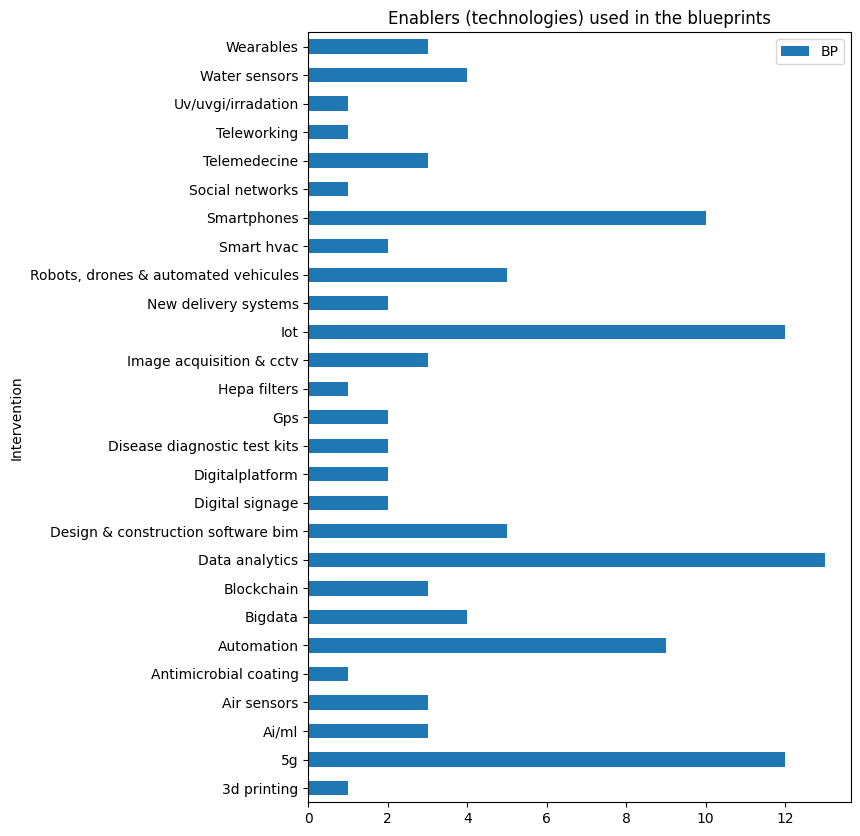

In [41]:
print(onto.Blueprint.instances()[0].get_properties())
ALL = []
for k in onto.Blueprint.instances():
    for i in k.has_BPEnabler:
        ALL.append([k.label[0],i.label[0]])
pd.DataFrame(ALL,columns=["BP","Intervention"]).groupby("Intervention").count().plot.barh(figsize=(7,10),title="Enablers (technologies) used in the blueprints")

{pbn_t3_5_v0.5.has_BPDescription, pbn_t3_5_v0.5.has_BPPhase, pbn_t3_5_v0.5.has_BPTitle, pbn_t3_5_v0.5.has_BPDemonstrated, pbn_t3_5_v0.5.has_BPIntervention, pbn_t3_5_v0.5.has_BlueprintSubject, pbn_t3_5_v0.5.has_BPType, pbn_t3_5_v0.5.has_BPRestriction, pbn_t3_5_v0.5.has_BPPermanent, rdf-schema.label, pbn_t3_5_v0.5.has_BPReason, pbn_t3_5_v0.5.has_BPEnabler, pbn_t3_5_v0.5.has_BPTransmission, pbn_t3_5_v0.5.has_BPValueProposition, pbn_t3_5_v0.5.has_BPContext, pbn_t3_5_v0.5.has_BPScale, pbn_t3_5_v0.5.has_BlueprintOwner, pbn_t3_5_v0.5.has_BPCapabilities, pbn_t3_5_v0.5.has_BPProblem}


<Axes: title={'center': 'Stakeholders of the blueprints'}, ylabel='Stakeholders'>

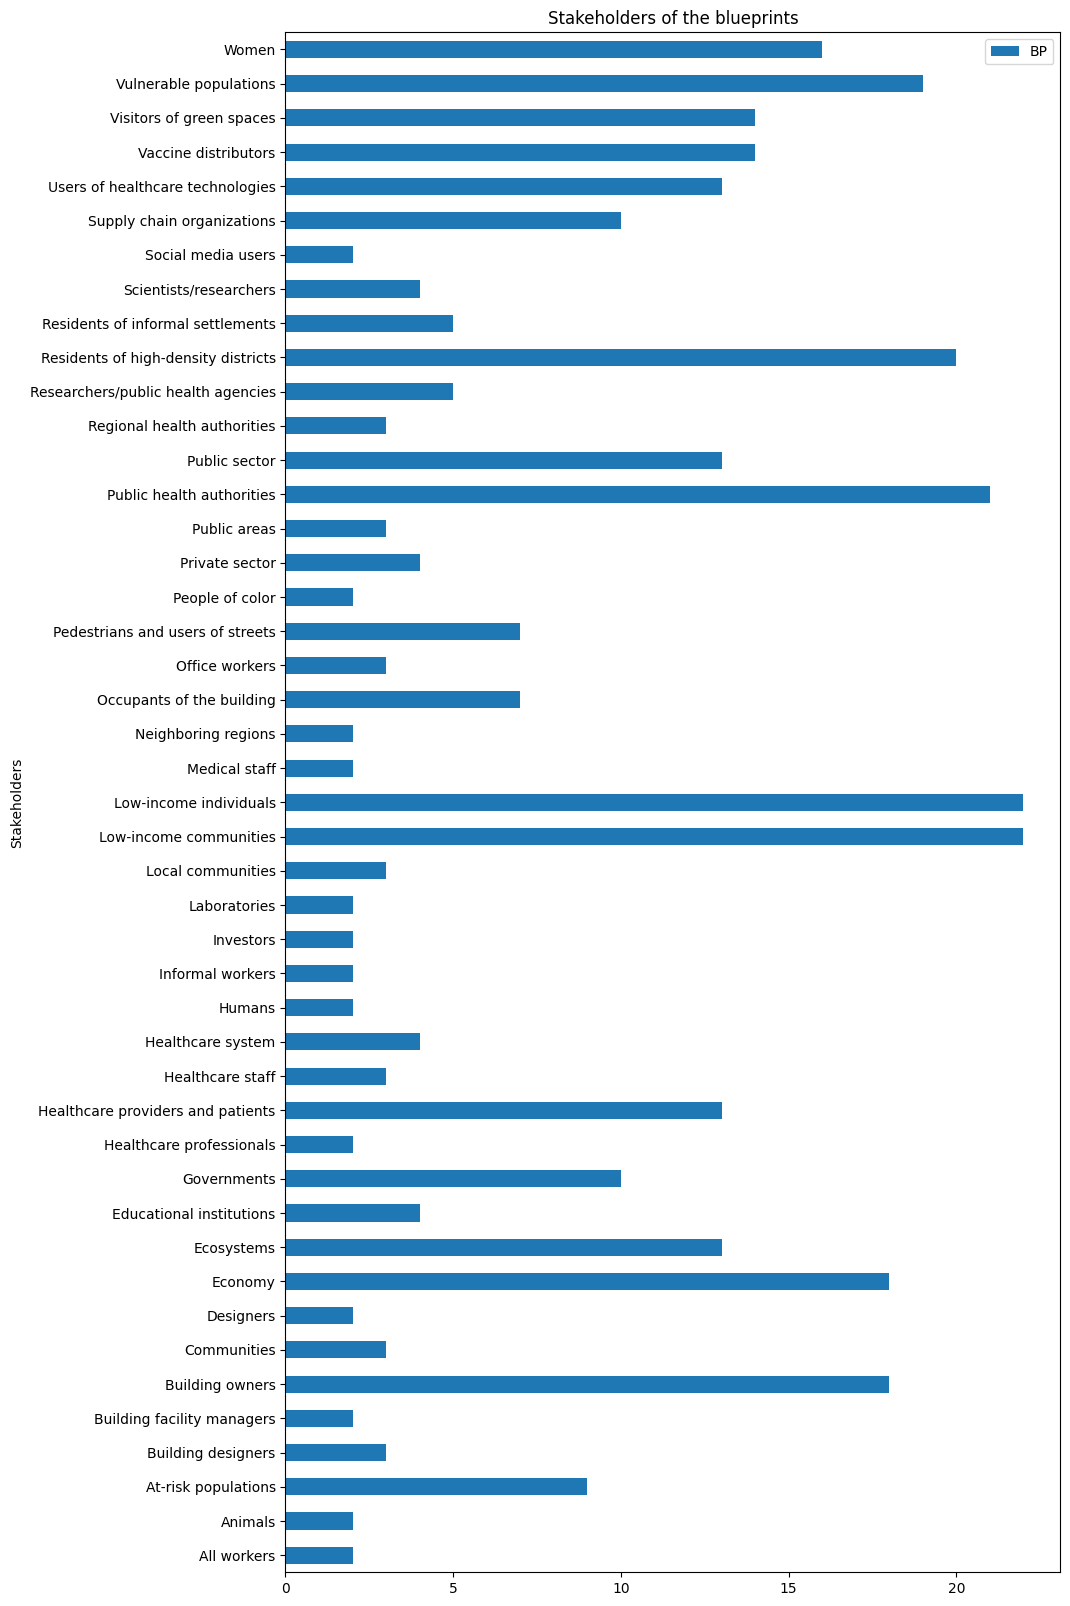

In [54]:
print(onto.Blueprint.instances()[0].get_properties())
ALL = []
for k in onto.Blueprint.instances():
    for i in k.has_BlueprintOwner:
        ALL.append([k.label[0],i.label[0]])
for k in onto.Blueprint.instances():
    for i in k.has_BlueprintSubject:
        ALL.append([k.label[0],i.label[0]])
df = pd.DataFrame(ALL,columns=["BP","Stakeholders"]).groupby("Stakeholders").count()
df[df.BP > 1].plot.barh(figsize=(10,20),title="Main stakeholders of the blueprints")